In [ ]:
import sys
import sklearn
import tensorflow as tf
import pandas as pd

import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

from sklearn.metrics import confusion_matrix


In [ ]:
from tensorflow import keras
data = keras.datasets.mnist

(xtrainfull, ytrainfull),(xtest,ytest) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrainfull.shape


(60000, 28, 28)

In [ ]:
xvalid, xtrain = xtrainfull[:5000]/255 , xtrainfull[5000:]/255
yvalid, ytrain = ytrainfull[:5000] , ytrainfull[5000:]

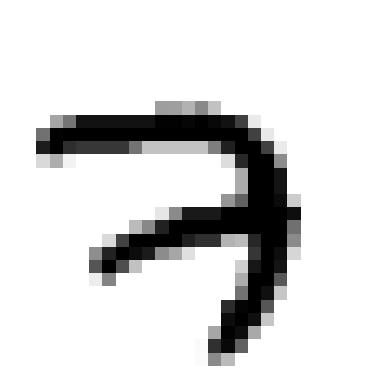

In [ ]:
plt.imshow(xtrain[0],cmap = "binary")
plt.axis('off')
plt.show()

In [ ]:
ytrain

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

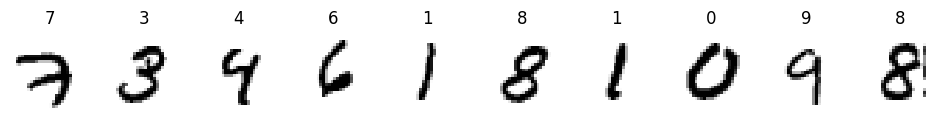

In [ ]:
rownum = 1
colnum = 10
plt.figure(figsize = (colnum * 1.2, rownum * 1.2))

for col in range(colnum):
  index = col
  plt.subplot(rownum,colnum,index+1)
  plt.imshow(xtrain[index], cmap = "binary", interpolation = "nearest")
  plt.axis('off')
  plt.title(ytrain[index],fontsize = 12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()




# Model 1

In [ ]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape = [28,28]))
model1.add(keras.layers.Dense(80,activation = "relu"))
model1.add(keras.layers.Dense(70,activation = "relu"))
model1.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 70)                5670      
                                                                 
 dense_2 (Dense)             (None, 10)                710       
                                                                 
Total params: 69,180
Trainable params: 69,180
Non-trainable params: 0
_________________________________________________________________


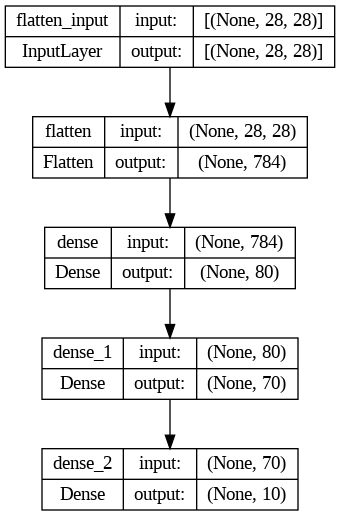

In [ ]:
keras.utils.plot_model(model1,show_shapes = True)

In [ ]:
hidden1 = model1.layers[1]
weights1, biases1 = hidden1.get_weights()

In [ ]:
weights1

array([[-0.06325333, -0.05016562, -0.07184549, ..., -0.07231228,
        -0.07335441, -0.03327354],
       [-0.02315229, -0.06444448, -0.01660647, ..., -0.06172411,
         0.03539443, -0.07827477],
       [ 0.04133171,  0.06440572,  0.00524163, ...,  0.02321041,
         0.04386725,  0.06129877],
       ...,
       [-0.02312732,  0.0096877 ,  0.03347436, ...,  0.00452312,
        -0.06342131,  0.04771734],
       [ 0.06500914, -0.01890149,  0.04951227, ...,  0.07256997,
        -0.05756744, -0.03590284],
       [-0.04738756,  0.06471267,  0.05461956, ..., -0.06012311,
         0.00497677,  0.0360565 ]], dtype=float32)

In [ ]:
biases1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#defining model
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

In [ ]:
history = model1.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6869 - accuracy: 0.8134 - val_loss: 0.3380 - val_accuracy: 0.9044
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3212 - accuracy: 0.9082 - val_loss: 0.2693 - val_accuracy: 0.9244
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2686 - accuracy: 0.9228 - val_loss: 0.2288 - val_accuracy: 0.9368
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2321 - accuracy: 0.9335 - val_loss: 0.2039 - val_accuracy: 0.9416
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2050 - accuracy: 0.9411 - val_loss: 0.1815 - val_accuracy: 0.9504
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1836 - accuracy: 0.9471 - val_loss: 0.1663 - val_accuracy: 0.9552
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1666 - accuracy: 0.9523 - val_loss: 0.1538 - val_accuracy

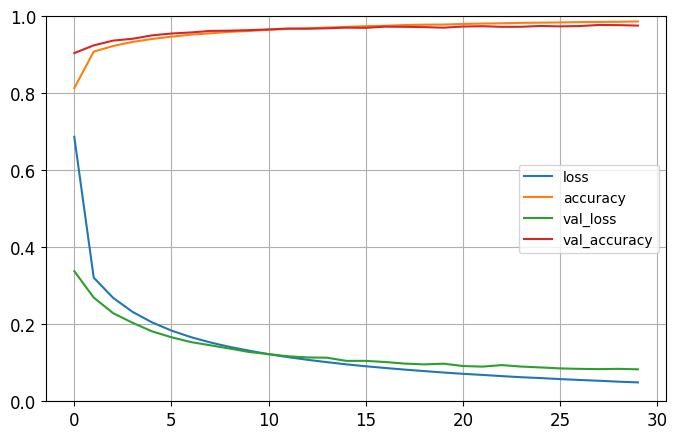

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#Accuracy Estimation
model1.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 16.3449 - accuracy: 0.9697


[16.344924926757812, 0.9696999788284302]

In [ ]:
yprob1 = model1.predict(xtest)
yprob1.round(2)


313/313 [==============================] - 1s 1ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#Predicted Values by the Model
ypred1 = np.argmax(yprob1,axis = 1)

In [ ]:
cm1 = confusion_matrix(ytest,ypred1)
cm1

array([[ 974,    0,    0,    2,    0,    0,    0,    1,    3,    0],
       [   0, 1124,    3,    2,    0,    1,    2,    1,    2,    0],
       [   3,    3, 1001,   12,    1,    0,    1,    8,    3,    0],
       [   1,    0,    0,  994,    0,    4,    0,    5,    4,    2],
       [   1,    0,    6,    1,  949,    0,    4,    3,    1,   17],
       [   5,    1,    0,   26,    1,  843,    9,    1,    4,    2],
       [   4,    3,    3,    1,    3,    3,  936,    3,    2,    0],
       [   1,    3,    7,    6,    0,    0,    0, 1005,    1,    5],
       [   6,    1,    5,   37,    5,    6,    5,    7,  897,    5],
       [   2,    5,    0,   11,    6,    0,    1,   10,    0,  974]])

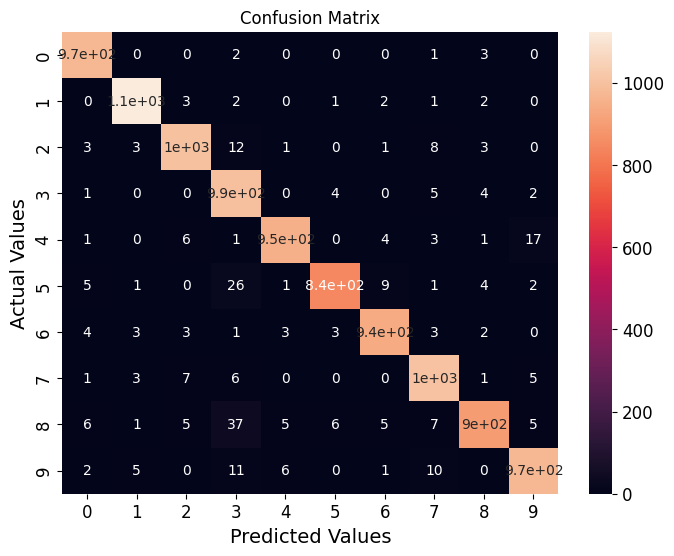

In [ ]:
#plotting the confusion matrix

cm1_df = pd.DataFrame(cm1)
plt.figure(figsize=(8,6))
sns.heatmap(cm1_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Other Models

Model 2

In [ ]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape = [28,28]))
model2.add(keras.layers.Dense(90,activation = "relu"))
model2.add(keras.layers.Dense(60,activation = "relu"))
model2.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 90)                70650     
                                                                 
 dense_1 (Dense)             (None, 60)                5460      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 76,720
Trainable params: 76,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

In [ ]:
history2 = model2.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7080 - accuracy: 0.8144 - val_loss: 0.3445 - val_accuracy: 0.9058
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3233 - accuracy: 0.9078 - val_loss: 0.2691 - val_accuracy: 0.9266
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9218 - val_loss: 0.2276 - val_accuracy: 0.9338
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2350 - accuracy: 0.9330 - val_loss: 0.2060 - val_accuracy: 0.9404
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2101 - accuracy: 0.9402 - val_loss: 0.1860 - val_accuracy: 0.9464
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1898 - accuracy: 0.9458 - val_loss: 0.1717 - val_accuracy: 0.9512
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1726 - accuracy: 0.9506 - val_loss: 0.1584 - val_accuracy:

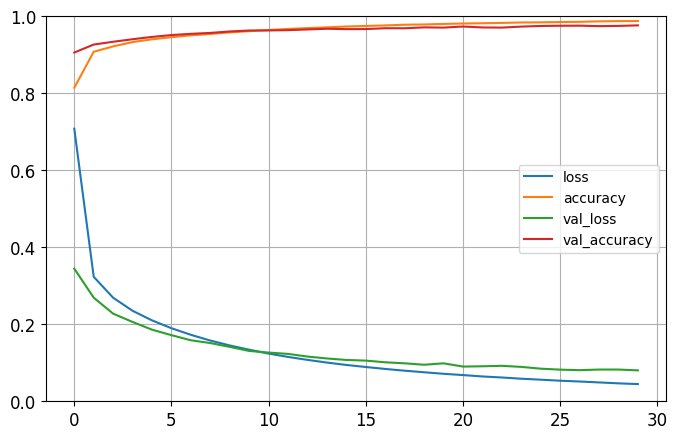

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model2.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 14.5584 - accuracy: 0.9729


[14.558418273925781, 0.9728999733924866]

In [ ]:
yprob2 = model2.predict(xtest)
yprob2.round(2)
ypred2 = np.argmax(yprob2,axis = 1)

313/313 [==============================] - 1s 1ms/step


In [ ]:
cm2 = confusion_matrix(ytest,ypred2)
cm2

array([[ 973,    0,    1,    1,    1,    1,    0,    1,    2,    0],
       [   0, 1120,    4,    4,    0,    1,    2,    1,    3,    0],
       [   5,    1, 1008,    6,    1,    0,    2,    4,    5,    0],
       [   1,    0,    2,  997,    1,    1,    0,    4,    1,    3],
       [   2,    0,    5,    1,  952,    0,    2,    4,    2,   14],
       [   4,    1,    0,   15,    1,  857,    6,    1,    5,    2],
       [  10,    3,    2,    2,    1,    3,  936,    1,    0,    0],
       [   3,    2,   13,    5,    1,    1,    0,  994,    2,    7],
       [   5,    0,    8,   25,    2,    3,    2,    3,  922,    4],
       [   4,    5,    1,   13,    4,    1,    1,    9,    1,  970]])

Model 3

In [ ]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape = [28,28]))
model3.add(keras.layers.Dense(100,activation = "relu"))
model3.add(keras.layers.Dense(50,activation = "relu"))
model3.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history3 = model3.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6930 - accuracy: 0.8141 - val_loss: 0.3235 - val_accuracy: 0.9108
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3049 - accuracy: 0.9126 - val_loss: 0.2501 - val_accuracy: 0.9282
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9294 - val_loss: 0.2075 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2140 - accuracy: 0.9389 - val_loss: 0.1847 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1884 - accuracy: 0.9456 - val_loss: 0.1663 - val_accuracy: 0.9522
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1687 - accuracy: 0.9514 - val_loss: 0.1522 - val_accuracy: 0.9584
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1524 - accuracy: 0.9563 - val_loss: 0.1409 - val_accuracy:

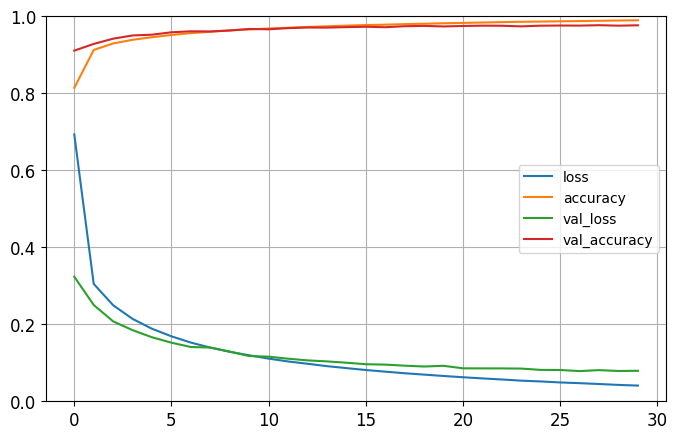

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model3.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 16.1917 - accuracy: 0.9695


[16.191686630249023, 0.9695000052452087]

In [ ]:
yprob3 = model3.predict(xtest)
yprob3.round(2)
ypred3 = np.argmax(yprob3,axis = 1)

313/313 [==============================] - 1s 1ms/step


In [ ]:
cm3 = confusion_matrix(ytest,ypred3)
cm3

array([[ 970,    0,    1,    0,    1,    4,    0,    2,    2,    0],
       [   0, 1119,    2,    3,    0,    1,    5,    2,    3,    0],
       [   4,    1, 1003,    8,    4,    0,    1,    8,    3,    0],
       [   0,    0,    2,  997,    0,    1,    0,    4,    2,    4],
       [   1,    0,    4,    0,  944,    0,    3,    4,    2,   24],
       [   3,    0,    0,   19,    2,  856,    4,    0,    3,    5],
       [   7,    3,    1,    2,    5,    6,  928,    0,    6,    0],
       [   0,    3,    8,    9,    1,    0,    0, 1003,    0,    4],
       [   3,    1,    5,   32,    6,    5,    3,    9,  907,    3],
       [   3,    5,    0,   11,    7,    2,    1,   10,    2,  968]])

model 4


In [ ]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape = [28,28]))
model4.add(keras.layers.Dense(60,activation = "tanh"))
model4.add(keras.layers.Dense(40,activation = "tanh"))
model4.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 60)                47100     
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
Total params: 49,950
Trainable params: 49,950
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history4 = model4.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6859 - accuracy: 0.8309 - val_loss: 0.3765 - val_accuracy: 0.9012
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3506 - accuracy: 0.9035 - val_loss: 0.2934 - val_accuracy: 0.9164
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9167 - val_loss: 0.2567 - val_accuracy: 0.9266
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9255 - val_loss: 0.2336 - val_accuracy: 0.9340
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2376 - accuracy: 0.9316 - val_loss: 0.2157 - val_accuracy: 0.9380
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2180 - accuracy: 0.9374 - val_loss: 0.2006 - val_accuracy: 0.9430
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2015 - accuracy: 0.9423 - val_loss: 0.1863 - val_accuracy:

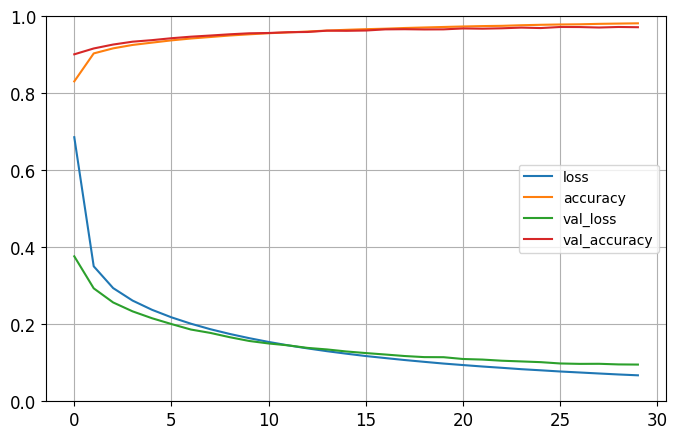

In [ ]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model4.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2103 - accuracy: 0.9377


[0.2102762907743454, 0.9376999735832214]

In [ ]:
yprob4 = model4.predict(xtest)
yprob4.round(2)
ypred4 = np.argmax(yprob4,axis = 1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
cm4 = confusion_matrix(ytest,ypred4)
cm4

array([[ 955,    0,    4,    1,    2,    2,    4,    4,    4,    4],
       [   0, 1107,    4,    3,    0,    0,    4,    6,   10,    1],
       [   8,    3,  957,   29,    3,    0,   10,   11,   10,    1],
       [   1,    2,   14,  962,    0,   12,    1,    5,   10,    3],
       [   0,    0,    3,    3,  909,    1,    9,    8,    5,   44],
       [   7,    3,    4,   36,    5,  803,    8,    4,   12,   10],
       [  11,    2,    9,    0,    7,    5,  912,    1,    9,    2],
       [   4,    8,   18,   10,   11,    0,    0,  946,    8,   23],
       [   7,    2,    8,   18,    5,    5,    3,    5,  916,    5],
       [   7,    5,    3,   17,   25,    5,    0,   17,   20,  910]])

Model 5

In [ ]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Flatten(input_shape = [28,28]))
model5.add(keras.layers.Dense(80,activation = "tanh"))
model5.add(keras.layers.Dense(70,activation = "tanh"))
model5.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 70)                5670      
                                                                 
 dense_2 (Dense)             (None, 10)                710       
                                                                 
Total params: 69,180
Trainable params: 69,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history5 = model5.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6458 - accuracy: 0.8339 - val_loss: 0.3564 - val_accuracy: 0.9024
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.9053 - val_loss: 0.2830 - val_accuracy: 0.9218
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.9179 - val_loss: 0.2477 - val_accuracy: 0.9292
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2536 - accuracy: 0.9275 - val_loss: 0.2249 - val_accuracy: 0.9352
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2295 - accuracy: 0.9345 - val_loss: 0.2058 - val_accuracy: 0.9416
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2102 - accuracy: 0.9402 - val_loss: 0.1920 - val_accuracy: 0.9448
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1940 - accuracy: 0.9449 - val_loss: 0.1778 - val_accuracy:

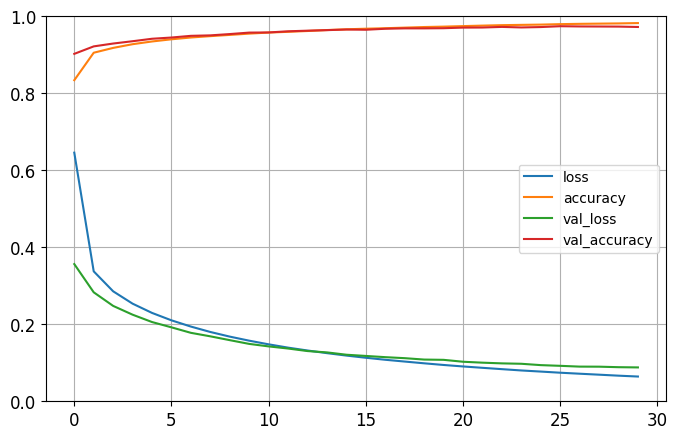

In [ ]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model5.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1732 - accuracy: 0.9493


[0.1731843799352646, 0.9492999911308289]

In [ ]:
yprob5 = model5.predict(xtest)
yprob5.round(2)
ypred5 = np.argmax(yprob5,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm5 = confusion_matrix(ytest,ypred5)
cm5

array([[ 968,    0,    1,    2,    1,    0,    3,    0,    2,    3],
       [   0, 1112,    3,    2,    0,    2,    2,   11,    3,    0],
       [   7,    4,  962,   29,    3,    0,    8,   12,    7,    0],
       [   2,    1,    9,  968,    2,   11,    0,    5,    7,    5],
       [   6,    0,    5,    1,  918,    2,   12,    7,    2,   29],
       [   9,    3,    1,   24,    4,  812,   15,    0,   17,    7],
       [   9,    2,    3,    1,    4,    6,  922,    0,   11,    0],
       [   2,    9,    9,    5,    3,    0,    1,  959,    8,   32],
       [   3,    1,    7,   14,    4,    2,   10,    5,  924,    4],
       [   3,    4,    0,    6,   21,    5,    1,    8,   13,  948]])

Model 6

In [ ]:
model6 = keras.models.Sequential()
model6.add(keras.layers.Flatten(input_shape = [28,28]))
model6.add(keras.layers.Dense(90,activation = "tanh"))
model6.add(keras.layers.Dense(60,activation = "tanh"))
model6.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 90)                70650     
                                                                 
 dense_1 (Dense)             (None, 60)                5460      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 76,720
Trainable params: 76,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history6 = model6.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6543 - accuracy: 0.8347 - val_loss: 0.3577 - val_accuracy: 0.9050
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.9050 - val_loss: 0.2830 - val_accuracy: 0.9180
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.9176 - val_loss: 0.2502 - val_accuracy: 0.9280
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2599 - accuracy: 0.9256 - val_loss: 0.2293 - val_accuracy: 0.9342
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2365 - accuracy: 0.9322 - val_loss: 0.2112 - val_accuracy: 0.9396
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9381 - val_loss: 0.1969 - val_accuracy: 0.9440
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1999 - accuracy: 0.9422 - val_loss: 0.1820 - val_accuracy:

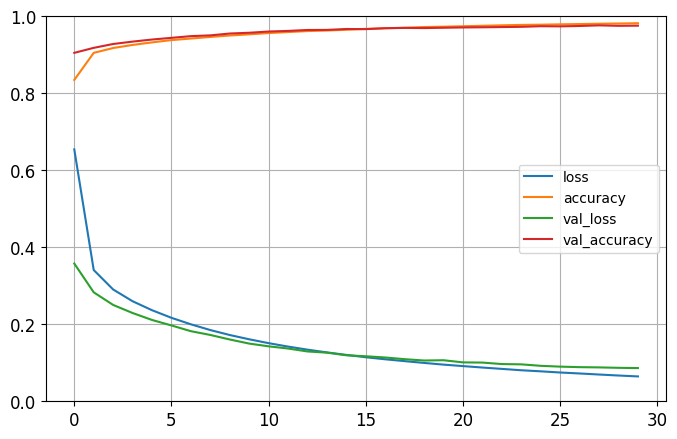

In [ ]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model6.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1734 - accuracy: 0.9472


[0.17343133687973022, 0.9472000002861023]

In [ ]:
yprob6 = model6.predict(xtest)
yprob6.round(2)
ypred6 = np.argmax(yprob6,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm6 = confusion_matrix(ytest,ypred6)
cm6

array([[ 970,    0,    2,    0,    0,    0,    4,    1,    2,    1],
       [   0, 1115,    3,    2,    0,    0,    1,    5,    9,    0],
       [  10,    3,  972,   23,    0,    1,    4,    7,   11,    1],
       [   0,    0,    9,  974,    2,    2,    1,    5,   13,    4],
       [   5,    2,    2,    3,  912,    2,    5,    5,    6,   40],
       [   9,    1,    1,   43,    4,  790,    8,    3,   19,   14],
       [  11,    3,    5,    4,    6,    4,  918,    0,    7,    0],
       [   4,    7,   17,    7,    3,    0,    0,  957,    3,   30],
       [  10,    1,    7,   15,    3,    1,    5,    7,  922,    3],
       [   8,    4,    2,   13,   11,    6,    1,    8,   14,  942]])

model 7

In [ ]:
model7 = keras.models.Sequential()
model7.add(keras.layers.Flatten(input_shape = [28,28]))
model7.add(keras.layers.Dense(70,activation = "tanh"))
model7.add(keras.layers.Dense(30,activation = "tanh"))
model7.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 70)                54950     
                                                                 
 dense_1 (Dense)             (None, 30)                2130      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 57,390
Trainable params: 57,390
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history7 = model7.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7204 - accuracy: 0.8220 - val_loss: 0.3946 - val_accuracy: 0.9026
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3639 - accuracy: 0.9005 - val_loss: 0.3008 - val_accuracy: 0.9194
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3001 - accuracy: 0.9152 - val_loss: 0.2603 - val_accuracy: 0.9286
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2641 - accuracy: 0.9247 - val_loss: 0.2347 - val_accuracy: 0.9346
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2381 - accuracy: 0.9314 - val_loss: 0.2158 - val_accuracy: 0.9376
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2176 - accuracy: 0.9370 - val_loss: 0.2001 - val_accuracy: 0.9408
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2009 - accuracy: 0.9417 - val_loss: 0.1852 - val_accuracy:

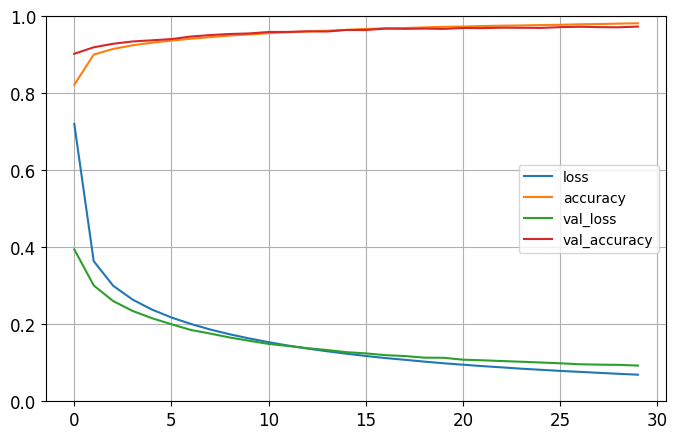

In [ ]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model7.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1903 - accuracy: 0.9429


[0.19031831622123718, 0.9429000020027161]

In [ ]:
yprob7 = model7.predict(xtest)
yprob7.round(2)
ypred7 = np.argmax(yprob7,axis = 1)


313/313 [==============================] - 1s 1ms/step


In [ ]:
cm7 = confusion_matrix(ytest,ypred7)
cm7

array([[ 965,    0,    2,    1,    0,    1,    3,    3,    2,    3],
       [   0, 1118,    5,    2,    0,    0,    3,    2,    4,    1],
       [   6,    7,  956,   21,    6,    4,    8,   11,   13,    0],
       [   1,    1,    4,  974,    0,    7,    0,    6,   13,    4],
       [   5,    2,    6,    2,  925,    2,    8,    5,    4,   23],
       [  15,    1,    2,   36,    5,  786,   14,    2,   15,   16],
       [   8,    3,    2,    1,    3,   11,  927,    0,    2,    1],
       [   1,    7,   15,   16,    6,    1,    0,  949,   11,   22],
       [   6,    3,    5,   23,    7,    9,   13,    4,  897,    7],
       [   4,    6,    0,   13,   27,    8,    2,    6,   11,  932]])

model 8

In [ ]:
model8 = keras.models.Sequential()
model8.add(keras.layers.Flatten(input_shape = [28,28]))
model8.add(keras.layers.Dense(60,activation = "relu"))
model8.add(keras.layers.Dense(40,activation = "relu"))
model8.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 60)                47100     
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
Total params: 49,950
Trainable params: 49,950
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model8.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history8 = model8.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7246 - accuracy: 0.7998 - val_loss: 0.3466 - val_accuracy: 0.9064
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3247 - accuracy: 0.9080 - val_loss: 0.2691 - val_accuracy: 0.9258
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.9221 - val_loss: 0.2312 - val_accuracy: 0.9328
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2373 - accuracy: 0.9320 - val_loss: 0.2117 - val_accuracy: 0.9422
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2129 - accuracy: 0.9388 - val_loss: 0.1921 - val_accuracy: 0.9466
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1932 - accuracy: 0.9449 - val_loss: 0.1787 - val_accuracy: 0.9526
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1769 - accuracy: 0.9493 - val_loss: 0.1661 - val_accuracy:

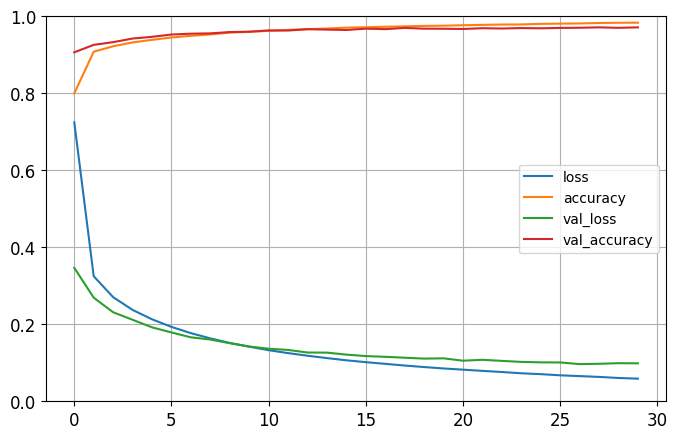

In [ ]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model8.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 23.6878 - accuracy: 0.9575


[23.687789916992188, 0.9574999809265137]

In [ ]:
yprob8 = model8.predict(xtest)
yprob8.round(2)
ypred8 = np.argmax(yprob8,axis = 1)

313/313 [==============================] - 1s 1ms/step


In [ ]:
cm8 = confusion_matrix(ytest,ypred8)
cm8

array([[ 971,    0,    0,    2,    0,    3,    1,    1,    1,    1],
       [   0, 1121,    2,    5,    0,    0,    2,    2,    3,    0],
       [   6,    1,  983,   28,    1,    0,    1,   10,    2,    0],
       [   0,    0,    0,  998,    0,    2,    0,    4,    2,    4],
       [   6,    0,    9,    2,  894,    0,    4,    7,    0,   60],
       [   4,    2,    0,   34,    1,  836,    6,    1,    4,    4],
       [   8,    3,    2,    3,    2,    8,  929,    2,    1,    0],
       [   1,    2,    7,   16,    2,    0,    0,  985,    1,   14],
       [   8,    0,    3,   61,    3,    6,    8,    6,  869,   10],
       [   3,    3,    0,    8,    3,    1,    1,    1,    0,  989]])

## 3 layer models

model 9

In [ ]:
model9 = keras.models.Sequential()
model9.add(keras.layers.Flatten(input_shape = [28,28]))
model9.add(keras.layers.Dense(80,activation = "relu"))
model9.add(keras.layers.Dense(50,activation = "relu"))
model9.add(keras.layers.Dense(20,activation = "relu"))
model9.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 68,080
Trainable params: 68,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model9.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history9 = model9.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8405 - accuracy: 0.7515 - val_loss: 0.3512 - val_accuracy: 0.9026
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3162 - accuracy: 0.9096 - val_loss: 0.2504 - val_accuracy: 0.9290
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2447 - accuracy: 0.9287 - val_loss: 0.2008 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2002 - accuracy: 0.9419 - val_loss: 0.1679 - val_accuracy: 0.9546
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1720 - accuracy: 0.9501 - val_loss: 0.1510 - val_accuracy: 0.9568
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1515 - accuracy: 0.9559 - val_loss: 0.1390 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1352 - accuracy: 0.9607 - val_loss: 0.1271 - val_accuracy:

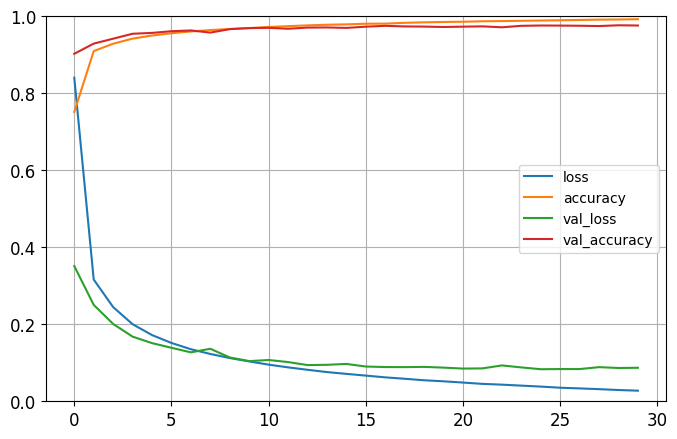

In [ ]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model9.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 20.4666 - accuracy: 0.9680


[20.466567993164062, 0.9679999947547913]

In [ ]:
yprob9 = model9.predict(xtest)
yprob9.round(2)
ypred9 = np.argmax(yprob9,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm9 = confusion_matrix(ytest,ypred9)
cm9

array([[ 965,    1,    2,    1,    1,    1,    4,    1,    2,    2],
       [   0, 1125,    2,    3,    0,    0,    2,    2,    1,    0],
       [   4,    2,  978,   23,    2,    0,    4,   16,    2,    1],
       [   0,    0,    0,  999,    0,    3,    0,    4,    2,    2],
       [   0,    0,    5,    1,  956,    0,    4,    8,    1,    7],
       [   3,    0,    0,   16,    0,  859,    7,    2,    3,    2],
       [   4,    4,    1,    2,    6,    5,  936,    0,    0,    0],
       [   0,    1,    3,    4,    0,    0,    0, 1015,    1,    4],
       [   5,    5,    3,   51,    4,   10,    5,    4,  878,    9],
       [   3,    2,    0,   11,    9,    5,    1,    9,    0,  969]])

Model 10

In [ ]:
model10 = keras.models.Sequential()
model10.add(keras.layers.Flatten(input_shape = [28,28]))
model10.add(keras.layers.Dense(80,activation = "sigmoid"))
model10.add(keras.layers.Dense(50,activation = "sigmoid"))
model10.add(keras.layers.Dense(20,activation = "sigmoid"))
model10.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 68,080
Trainable params: 68,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model10.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history10 = model10.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3010 - accuracy: 0.1174 - val_loss: 2.2916 - val_accuracy: 0.1298
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2861 - accuracy: 0.1403 - val_loss: 2.2780 - val_accuracy: 0.1828
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2688 - accuracy: 0.2177 - val_loss: 2.2546 - val_accuracy: 0.1858
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2301 - accuracy: 0.2926 - val_loss: 2.1936 - val_accuracy: 0.2684
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.1199 - accuracy: 0.3476 - val_loss: 2.0224 - val_accuracy: 0.3780
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.8949 - accuracy: 0.4073 - val_loss: 1.7665 - val_accuracy: 0.4472
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6285 - accuracy: 0.4829 - val_loss: 1.4834 - val_accuracy:

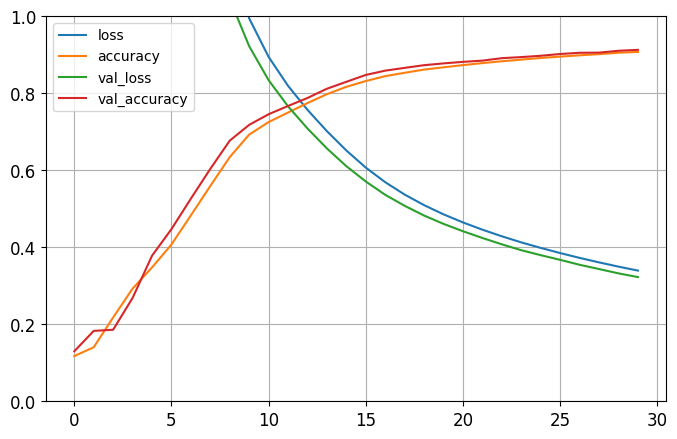

In [ ]:
pd.DataFrame(history10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model10.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8993


[0.34896034002304077, 0.8992999792098999]

In [ ]:
yprob10 = model10.predict(xtest)
yprob10.round(2)
ypred10 = np.argmax(yprob10,axis = 1)

313/313 [==============================] - 1s 1ms/step


In [ ]:
cm10 = confusion_matrix(ytest,ypred10)
cm10

array([[ 954,    0,    9,    1,    0,    5,    7,    3,    1,    0],
       [   0, 1088,    7,    3,    2,    1,    3,    1,   28,    2],
       [  15,    4,  923,   18,    4,    0,   23,    6,   31,    8],
       [   2,    0,   24,  889,    0,   29,    1,   13,   49,    3],
       [   2,    2,   12,    0,  881,    0,   21,    0,    7,   57],
       [  35,    3,    6,   35,    8,  724,   18,    3,   54,    6],
       [  22,    4,    9,    0,    7,   19,  894,    1,    2,    0],
       [   2,    7,   24,   13,    7,    1,    0,  897,    7,   70],
       [   6,    8,    8,   18,    6,   20,   12,    0,  893,    3],
       [   6,    5,    2,    6,   68,    7,    2,   18,   45,  850]])

Model 11

In [ ]:
model11 = keras.models.Sequential()
model11.add(keras.layers.Flatten(input_shape = [28,28]))
model11.add(keras.layers.Dense(80,activation = "tanh"))
model11.add(keras.layers.Dense(50,activation = "tanh"))
model11.add(keras.layers.Dense(20,activation = "tanh"))
model11.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 68,080
Trainable params: 68,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model11.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history11 = model11.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7536 - accuracy: 0.8223 - val_loss: 0.3947 - val_accuracy: 0.9072
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3574 - accuracy: 0.9056 - val_loss: 0.2868 - val_accuracy: 0.9248
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.9208 - val_loss: 0.2377 - val_accuracy: 0.9362
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2410 - accuracy: 0.9321 - val_loss: 0.2070 - val_accuracy: 0.9422
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2102 - accuracy: 0.9404 - val_loss: 0.1837 - val_accuracy: 0.9490
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1867 - accuracy: 0.9473 - val_loss: 0.1683 - val_accuracy: 0.9542
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1681 - accuracy: 0.9519 - val_loss: 0.1525 - val_accuracy:

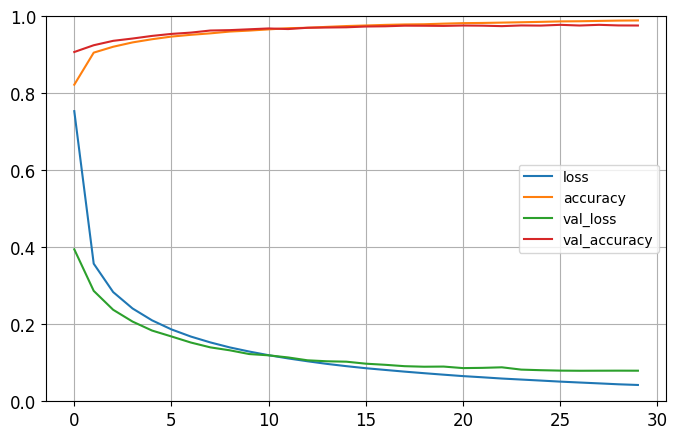

In [ ]:
pd.DataFrame(history11.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model11.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.2912 - accuracy: 0.9137


[0.2911841869354248, 0.9136999845504761]

In [ ]:
yprob11 = model11.predict(xtest)
yprob11.round(2)
ypred11 = np.argmax(yprob11,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm11 = confusion_matrix(ytest,ypred11)
cm11

array([[ 953,    0,    5,    4,    1,    5,    7,    0,    1,    4],
       [   1, 1100,   10,    7,    1,    0,    1,    6,    4,    5],
       [  11,    7,  920,   44,    3,    2,   11,   18,   13,    3],
       [   1,    2,    6,  964,    2,   13,    0,    3,   11,    8],
       [   4,    5,    9,    3,  864,    0,    7,   14,    4,   72],
       [   8,    1,    2,   52,    5,  795,   10,    3,    7,    9],
       [   6,    4,    7,    3,    6,    8,  920,    0,    2,    2],
       [   0,   10,   14,   41,    7,    2,    0,  931,    0,   23],
       [   9,    9,   34,   77,    5,    9,    4,    5,  806,   16],
       [   5,    3,    2,   44,   19,    7,    1,   30,   14,  884]])

Model 12

In [ ]:
model12 = keras.models.Sequential()
model12.add(keras.layers.Flatten(input_shape = [28,28]))
model12.add(keras.layers.Dense(80,activation = "sigmoid"))
model12.add(keras.layers.Dense(70,activation = "sigmoid"))
model12.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 70)                5670      
                                                                 
 dense_2 (Dense)             (None, 10)                710       
                                                                 
Total params: 69,180
Trainable params: 69,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model12.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history12 = model12.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2328 - accuracy: 0.3110 - val_loss: 2.1240 - val_accuracy: 0.5162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.9035 - accuracy: 0.6005 - val_loss: 1.5975 - val_accuracy: 0.6636
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3016 - accuracy: 0.7169 - val_loss: 1.0363 - val_accuracy: 0.7684
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9045 - accuracy: 0.7865 - val_loss: 0.7709 - val_accuracy: 0.8176
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7122 - accuracy: 0.8243 - val_loss: 0.6279 - val_accuracy: 0.8490
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5996 - accuracy: 0.8483 - val_loss: 0.5382 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5270 - accuracy: 0.8628 - val_loss: 0.4779 - val_accuracy:

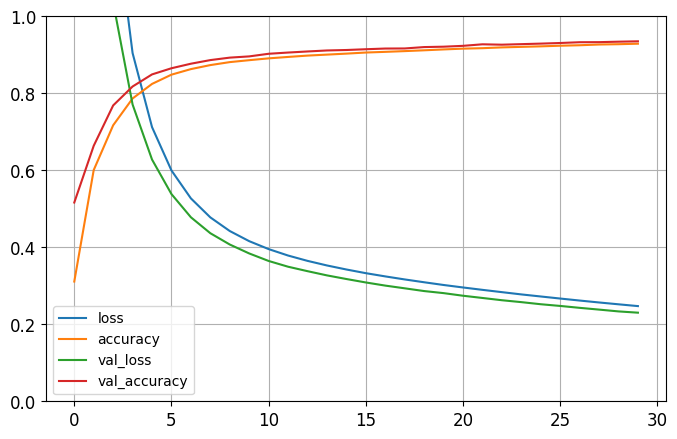

In [ ]:
pd.DataFrame(history12.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model12.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9212


[0.2675715684890747, 0.9211999773979187]

In [ ]:
yprob12 = model12.predict(xtest)
yprob12.round(2)
ypred12 = np.argmax(yprob12,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm12 = confusion_matrix(ytest,ypred12)
cm12

array([[ 969,    0,    2,    1,    0,    1,    5,    1,    1,    0],
       [   0, 1103,    2,    3,    1,    0,    5,    3,   17,    1],
       [   9,    4,  948,   11,    5,    0,   17,   11,   25,    2],
       [   4,    3,   19,  928,    0,   14,    2,   11,   26,    3],
       [   1,    2,    6,    0,  885,    0,   13,    1,   12,   62],
       [  25,    4,    2,   51,    8,  715,   18,    6,   56,    7],
       [  18,    2,    5,    1,    9,    4,  907,    1,   11,    0],
       [   2,    6,   29,   12,    6,    0,    1,  913,    2,   57],
       [   6,    3,    3,   23,    5,    1,    9,    4,  917,    3],
       [  11,    6,    1,   10,   22,    2,    2,   11,   17,  927]])

Model 13

In [ ]:
model13 = keras.models.Sequential()
model13.add(keras.layers.Flatten(input_shape = [28,28]))
model13.add(keras.layers.Dense(80,activation = "sigmoid"))
model13.add(keras.layers.Dense(70,activation = "sigmoid"))
model13.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 70)                5670      
                                                                 
 dense_2 (Dense)             (None, 10)                710       
                                                                 
Total params: 69,180
Trainable params: 69,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model13.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history13 = model13.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 2.2178 - accuracy: 0.3330 - val_loss: 2.0858 - val_accuracy: 0.5326
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.8229 - accuracy: 0.5943 - val_loss: 1.4894 - val_accuracy: 0.6634
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2382 - accuracy: 0.7140 - val_loss: 1.0135 - val_accuracy: 0.7556
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8945 - accuracy: 0.7824 - val_loss: 0.7661 - val_accuracy: 0.8066
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7093 - accuracy: 0.8208 - val_loss: 0.6264 - val_accuracy: 0.8428
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5993 - accuracy: 0.8452 - val_loss: 0.5397 - val_accuracy: 0.8586
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5282 - accuracy: 0.8611 - val_loss: 0.4807 - val_accuracy:

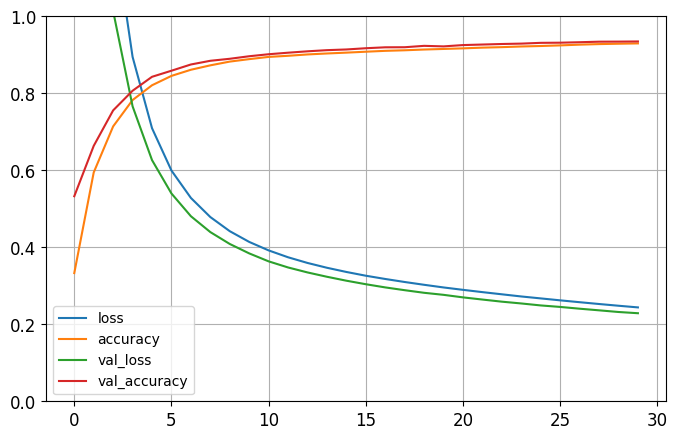

In [ ]:
pd.DataFrame(history13.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model13.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2594 - accuracy: 0.9247


[0.2593933045864105, 0.9247000217437744]

In [ ]:
yprob13 = model13.predict(xtest)
yprob13.round(2)
ypred13 = np.argmax(yprob13,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm13 = confusion_matrix(ytest,ypred13)
cm13

array([[ 962,    0,    2,    2,    2,    1,    7,    1,    2,    1],
       [   0, 1097,    6,    3,    1,    0,    4,    3,   21,    0],
       [  13,    2,  944,   11,   11,    0,   13,   11,   26,    1],
       [   0,    0,   24,  929,    0,   10,    2,   14,   27,    4],
       [   1,    1,    4,    0,  915,    0,   13,    1,    8,   39],
       [  18,    1,    1,   50,   11,  720,   17,    7,   60,    7],
       [  18,    3,    2,    1,   11,    5,  908,    0,   10,    0],
       [   3,    8,   22,    9,    7,    0,    0,  946,    2,   31],
       [   5,    2,    5,   15,    5,    4,   12,    8,  913,    5],
       [  11,    3,    1,   10,   40,    2,    1,   11,   17,  913]])

Model 14

In [ ]:
model14 = keras.models.Sequential()
model14.add(keras.layers.Flatten(input_shape = [28,28]))
model14.add(keras.layers.Dense(90,activation = "sigmoid"))
model14.add(keras.layers.Dense(60,activation = "sigmoid"))
model14.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 90)                70650     
                                                                 
 dense_1 (Dense)             (None, 60)                5460      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 76,720
Trainable params: 76,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model14.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history14 = model14.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2192 - accuracy: 0.3291 - val_loss: 2.0929 - val_accuracy: 0.4848
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.8467 - accuracy: 0.5761 - val_loss: 1.5300 - val_accuracy: 0.6580
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2522 - accuracy: 0.7086 - val_loss: 1.0098 - val_accuracy: 0.7662
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8850 - accuracy: 0.7900 - val_loss: 0.7561 - val_accuracy: 0.8170
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6981 - accuracy: 0.8251 - val_loss: 0.6163 - val_accuracy: 0.8474
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5889 - accuracy: 0.8473 - val_loss: 0.5302 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5194 - accuracy: 0.8626 - val_loss: 0.4727 - val_accuracy:

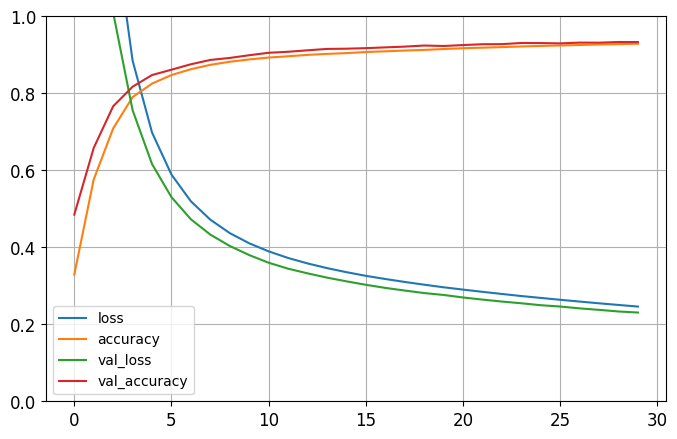

In [ ]:
pd.DataFrame(history14.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model14.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9247


[0.2671809196472168, 0.9247000217437744]

In [ ]:
yprob14 = model14.predict(xtest)
yprob14.round(2)
ypred14 = np.argmax(yprob14,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm14 = confusion_matrix(ytest,ypred14)
cm14

array([[ 962,    0,    1,    3,    1,    4,    4,    2,    3,    0],
       [   0, 1098,    4,    5,    1,    0,    5,    2,   19,    1],
       [  11,    3,  950,   10,    9,    2,   16,   10,   21,    0],
       [   1,    1,   25,  932,    0,   12,    0,    8,   30,    1],
       [   2,    0,    5,    1,  913,    0,    9,    3,   11,   38],
       [  21,    2,    1,   55,    9,  704,   23,    7,   62,    8],
       [  17,    2,    2,    0,   11,   10,  909,    0,    7,    0],
       [   3,    9,   29,    6,    5,    0,    0,  944,    2,   30],
       [   5,    1,    6,   17,    5,    3,    7,    3,  925,    2],
       [   8,    3,    1,    9,   37,    1,    1,   10,   29,  910]])

model 15

In [ ]:
model15 = keras.models.Sequential()
model15.add(keras.layers.Flatten(input_shape = [28,28]))
model15.add(keras.layers.Dense(60,activation = "sigmoid"))
model15.add(keras.layers.Dense(40,activation = "sigmoid"))
model15.add(keras.layers.Dense(10,activation = "softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model15.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 60)                47100     
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
Total params: 49,950
Trainable params: 49,950
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model15.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history15 = model15.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2145 - accuracy: 0.3203 - val_loss: 2.0941 - val_accuracy: 0.4388
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.8851 - accuracy: 0.5103 - val_loss: 1.6259 - val_accuracy: 0.5774
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3822 - accuracy: 0.6387 - val_loss: 1.1438 - val_accuracy: 0.7106
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 1.0019 - accuracy: 0.7501 - val_loss: 0.8572 - val_accuracy: 0.7942
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7839 - accuracy: 0.8063 - val_loss: 0.6931 - val_accuracy: 0.8324
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6545 - accuracy: 0.8352 - val_loss: 0.5920 - val_accuracy: 0.8510
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5726 - accuracy: 0.8529 - val_loss: 0.5248 - val_accuracy:

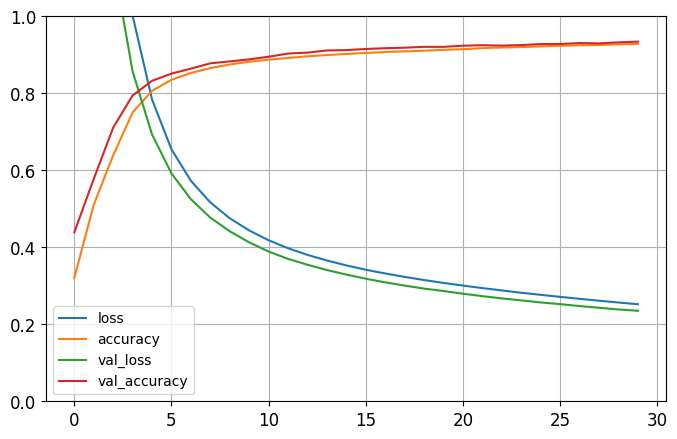

In [ ]:
pd.DataFrame(history15.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model15.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2608 - accuracy: 0.9254


[0.2607530355453491, 0.9254000186920166]

In [ ]:
yprob15 = model15.predict(xtest)
yprob15.round(2)
ypred15 = np.argmax(yprob15,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm15 = confusion_matrix(ytest,ypred15)
cm15

array([[ 958,    0,    4,    0,    1,    1,   10,    1,    5,    0],
       [   0, 1101,    3,    6,    1,    0,    4,    1,   19,    0],
       [  13,    1,  944,   14,    9,    1,   16,    5,   24,    5],
       [   2,    0,   23,  928,    0,   12,    0,    8,   28,    9],
       [   1,    1,    5,    1,  912,    0,    9,    1,   10,   42],
       [  23,    1,    5,   51,    6,  717,   12,    1,   70,    6],
       [  11,    2,    3,    0,    9,    7,  917,    0,    9,    0],
       [   4,   11,   33,    6,    7,    0,    0,  934,    3,   30],
       [   4,    4,    9,   16,    6,    4,   11,    3,  912,    5],
       [   9,    6,    3,   13,   19,    3,    1,    7,   17,  931]])